In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("날씨 및 사고 데이터.csv")

In [69]:
weather = [
    '기온',
    '강수량',
    '풍속',
    '습도',
    '적설량',
    '증기압',
    '일조량',
    '일사량',
    '중하층운량',
    '시정']
accident = [
    '익수',
    '기타 수난',
    '자살기도',
    '차량추락',
    '물놀이',
    '선박',
    '사체인양',
    '무동력수상레져',
    '동력수상레져',
    '물놀이 익수',
    '어패류 채취 익수',
    '차량추락 침수',
    '시설물 침수',
    '수상표류',
    '선박조난',
    '야영중 고립',
    '계곡·급류사고'
]

# 상관관계

### 전처리

In [70]:
corrD = data.corr()
corrD.loc['적설량','적설량_기타 수난']

-0.3333333333333336

In [71]:
corr_dfAbs = pd.DataFrame()
corr_dfAsc = pd.DataFrame()
corr_dfDes = pd.DataFrame()

for i in weather:
    for j in accident:
        _str = i+'_'+j
        corr_dfAbs.loc[i,j] = abs(corrD.loc[i,_str])
        corr_dfAsc.loc[i,j] = corrD.loc[i,_str]
        corr_dfDes.loc[i,j] = -(corrD.loc[i,_str])
corr_dfAsc

,익수,기타 수난,자살기도,차량추락,물놀이,선박,사체인양,무동력수상레져,동력수상레져,물놀이 익수,어패류 채취 익수,차량추락 침수,시설물 침수,수상표류,선박조난,야영중 고립,계곡·급류사고
기온,0.279924,0.263770,0.098512,0.031816,0.424935,0.023799,0.024416,0.140807,0.178191,0.305542,0.060388,-0.003069,0.108374,0.277992,-0.031274,0.065119,0.078850
강수량,-0.126254,-0.122933,-0.108967,-0.082436,-0.131235,-0.091462,-0.062425,-0.089562,-0.098424,-0.114945,-0.095296,-0.056819,-0.039229,-0.109744,-0.080801,-0.044881,-0.017080
풍속,-0.616098,-0.647216,-0.481315,-0.341126,-0.538397,-0.420096,-0.224760,-0.297457,-0.331554,-0.474522,-0.374903,-0.261889,-0.475574,-0.453686,-0.306003,-0.191922,-0.181017
습도,0.651812,0.849458,0.572562,0.420375,0.585980,0.396575,0.307486,0.282313,0.295757,0.439883,0.211868,0.299730,0.603599,0.523554,0.182907,0.250655,0.272918
적설량,-0.334026,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.332820,-0.333333,-0.333333,-0.333333,-0.333333
증기압,-0.130564,-0.218414,-0.116696,-0.120420,0.197621,-0.162380,-0.050437,-0.056362,-0.030100,0.110513,-0.151962,-0.098889,0.003377,0.115828,-0.179616,0.020135,0.084222
일조량,-0.172399,-0.345956,-0.415572,-0.485999,0.167325,-0.218972,-0.424615,0.331904,0.326075,0.228623,0.093971,-0.546569,-0.484977,0.055268,0.051162,-0.441129,-0.500000
일사량,-0.100045,-0.109524,-0.103765,-0.098997,-0.088670,-0.117402,-0.129999,-0.113916,-0.115616,-0.085208,-0.101625,-0.106537,-0.135470,-0.106690,-0.137127,-0.097206,-0.130342
중하층운량,-0.595402,-0.532724,-0.617900,-0.481001,-0.710215,-0.473136,-0.596285,-0.554017,-0.704067,-0.721790,-0.540013,-0.444446,0.015492,-0.652781,-0.585135,-0.613941,0.789352
시정,0.011624,0.006044,0.001087,0.008755,0.010560,0.004682,-0.007850,0.010383,0.011848,0.008737,0.008367,0.003030,-0.011349,0.006919,0.009354,0.011225,-0.041042


### 히트맵 시각화

Text(0.5, 1.0, '상관관계')

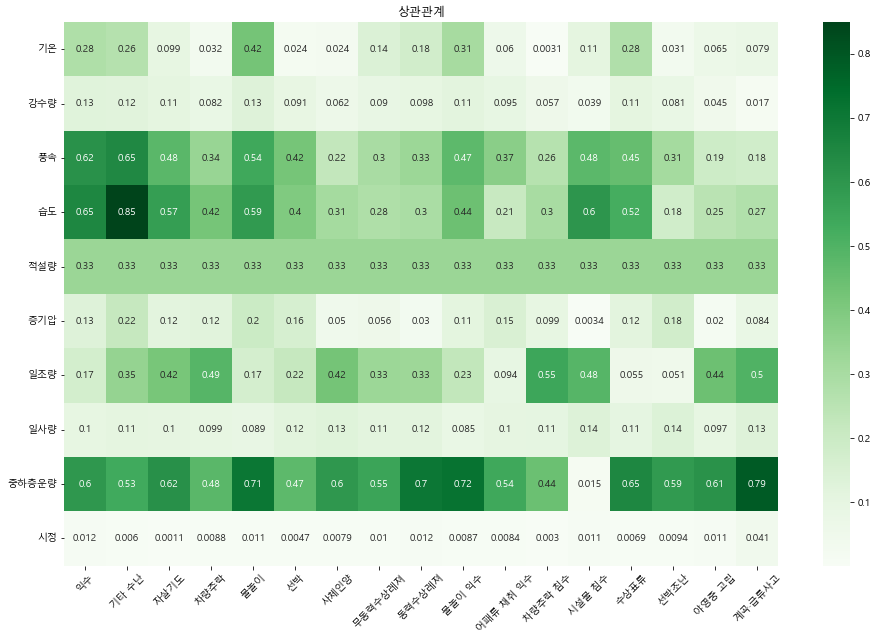

In [72]:
# 상관관계 (절대값)
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(16,10))
sns.heatmap(corr_dfAbs,cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("상관관계")

Text(0.5, 1.0, '양의 상관관계')

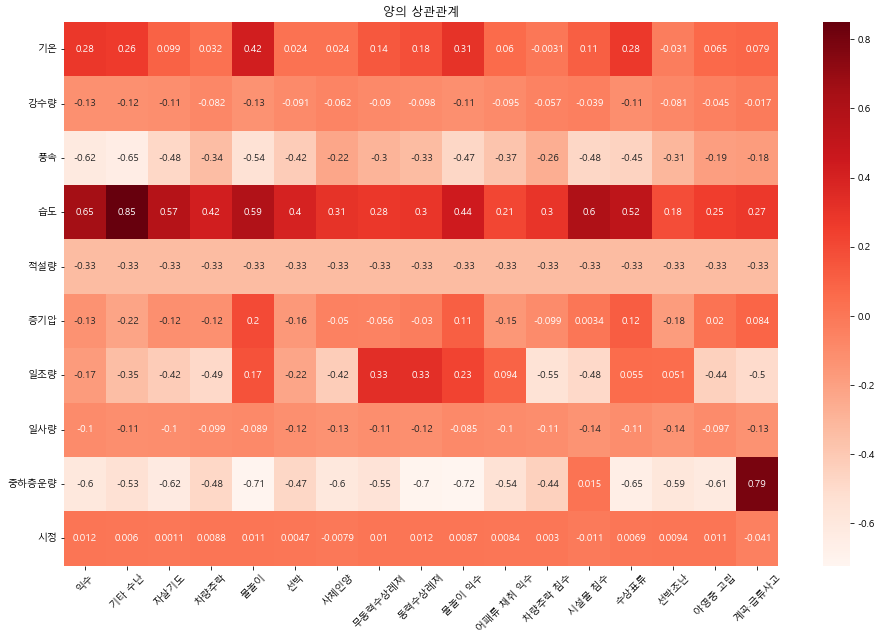

In [49]:
# 양의 상관관계 (정비례)
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(16,10))
sns.heatmap(corr_dfAsc,cmap='Reds',annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("양의 상관관계")

Text(0.5, 1.0, '음의 상관관계')

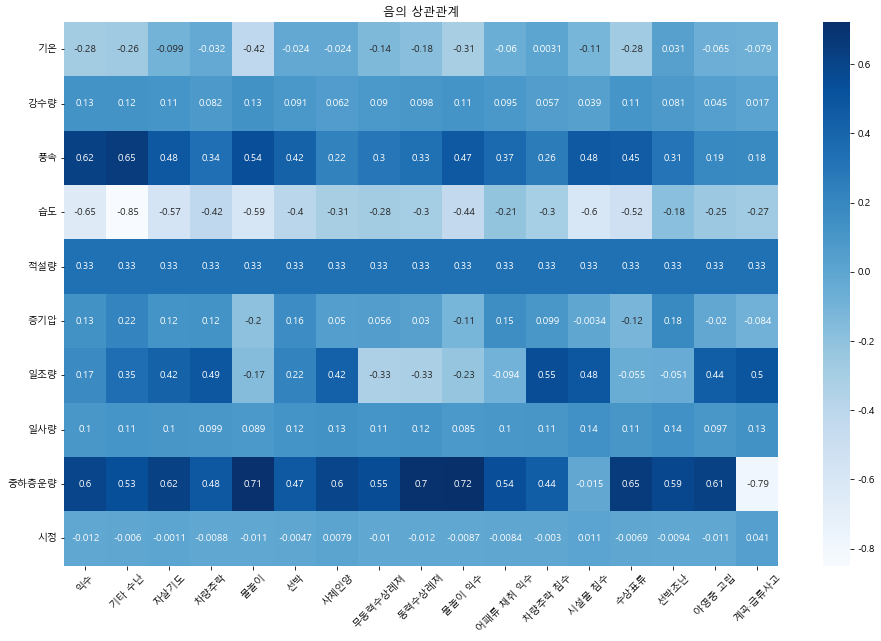

In [52]:
# 음의 상관관계 (반비례)
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(16,10))
sns.heatmap(corr_dfDes,cmap='Blues',annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("음의 상관관계")

## 산점도 시각화(|r| >= 0.6)

익수

Text(0.5, 1.0, '익수와 습도 산점도(r=0.65)')

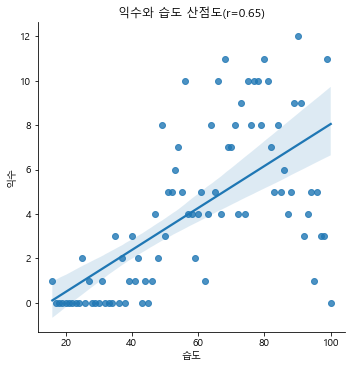

In [148]:
# 습도
sns.lmplot(x='습도',y='습도_익수',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('익수')
plt.title('익수와 습도 산점도(r=0.65)')

Text(0.5, 1.0, '익수와 풍속 산점도(r=-0.62)')

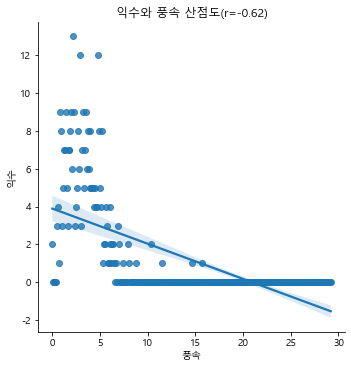

In [149]:
# 풍속
sns.lmplot(x='풍속',y='풍속_익수',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('익수')
plt.title('익수와 풍속 산점도(r=-0.62)')

Text(0.5, 1.0, '익수와 중하층운량 산점도(r=-0.6)')

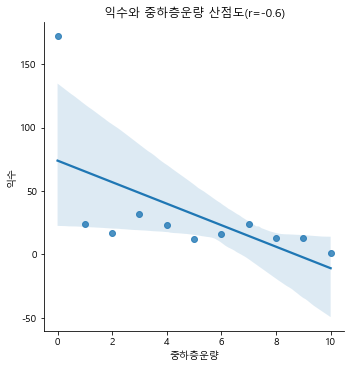

In [150]:
# 중하층운량
sns.lmplot(x='중하층운량',y='중하층운량_익수',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('익수')
plt.title('익수와 중하층운량 산점도(r=-0.6)')

기타 수난

Text(0.5, 1.0, '기타 수난과 습도 산점도(r=0.85)')

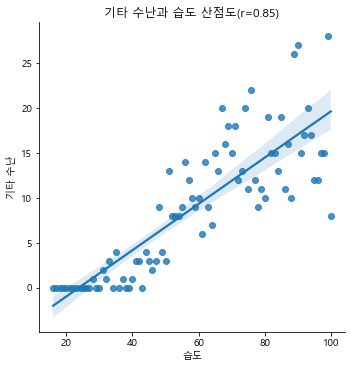

In [131]:
# 습도
sns.lmplot(x='습도',y='습도_기타 수난',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('기타 수난')
plt.title('기타 수난과 습도 산점도(r=0.85)')

Text(0.5, 1.0, '기타 수난과 풍속 산점도(r=-0.65)')

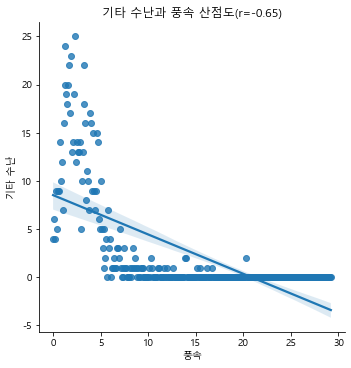

In [133]:
# 풍속
sns.lmplot(x='풍속',y='풍속_기타 수난',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('기타 수난')
plt.title('기타 수난과 풍속 산점도(r=-0.65)')

자살기도

Text(0.5, 1.0, '자살기도와 중하층운량 산점도(r=-0.62)')

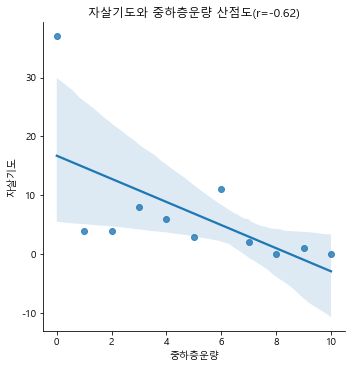

In [134]:
#중하층운량
sns.lmplot(x='중하층운량',y='중하층운량_자살기도',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('자살기도')
plt.title('자살기도와 중하층운량 산점도(r=-0.62)')

물놀이

Text(0.5, 1.0, '물놀이와 중하층운량(r=-0.71)')

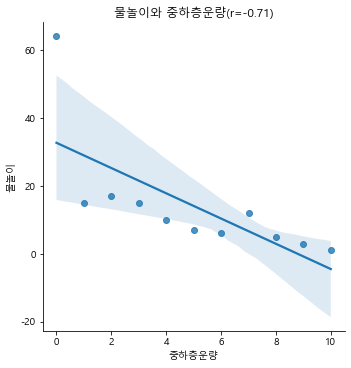

In [135]:
#중하층운량
sns.lmplot(x='중하층운량',y='중하층운량_물놀이',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('물놀이')
plt.title('물놀이와 중하층운량(r=-0.71)')

사체인양

Text(0.5, 1.0, '사체인양과 중하층운량(r=-0.6)')

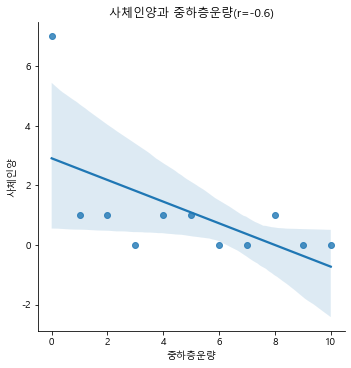

In [138]:
# 중하층운량
sns.lmplot(x='중하층운량',y='중하층운량_사체인양',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('사체인양')
plt.title('사체인양과 중하층운량(r=-0.6)')

동력수상레져

Text(0.5, 1.0, '동력수상레져와 중하층운량(r=-0.7)')

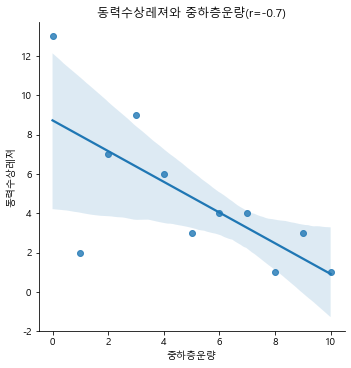

In [139]:
# 중하층운량
sns.lmplot(x='중하층운량',y='중하층운량_동력수상레져',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('동력수상레져')
plt.title('동력수상레져와 중하층운량(r=-0.7)')

물놀이 익수

Text(0.5, 1.0, '물놀이 익수와 중하층운량(r=-0.72)')

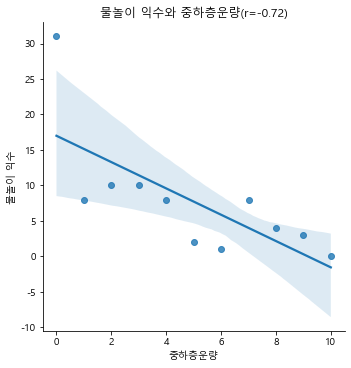

In [140]:
# 중하층운량
sns.lmplot(x='중하층운량',y='중하층운량_물놀이 익수',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('물놀이 익수')
plt.title('물놀이 익수와 중하층운량(r=-0.72)')

시설물 침수

Text(0.5, 1.0, '시설물 침수와 습도(r=0.6)')

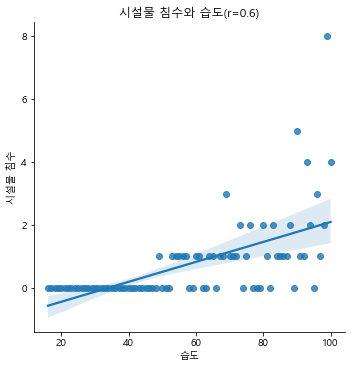

In [152]:
# 습도
sns.lmplot(x='습도',y='습도_시설물 침수',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('시설물 침수')
plt.title('시설물 침수와 습도(r=0.6)')

수상표류

Text(0.5, 1.0, '수상표류와 중하층운량(r=-0.65)')

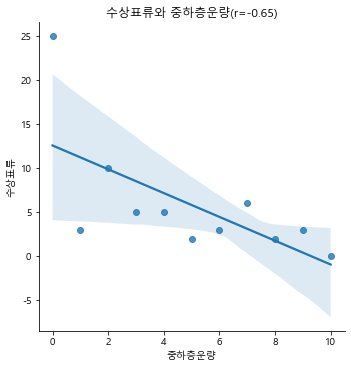

In [144]:
# 중하층운량
sns.lmplot(x='중하층운량',y='중하층운량_수상표류',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('수상표류')
plt.title('수상표류와 중하층운량(r=-0.65)')

야영중 고립

Text(0.5, 1.0, '야영중 고립과 중하층운량(r=-0.61)')

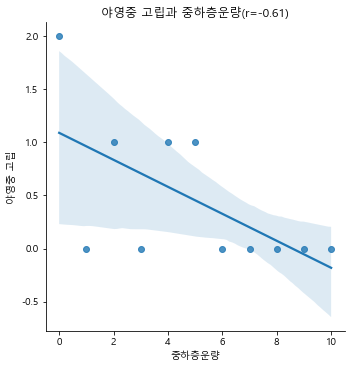

In [147]:
# 중하층운량
sns.lmplot(x='중하층운량',y='중하층운량_야영중 고립',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('야영중 고립')
plt.title('야영중 고립과 중하층운량(r=-0.61)')

계곡·급류사고

Text(0.5, 1.0, '계곡·급류사고와 중하층운량(r=0.79)')

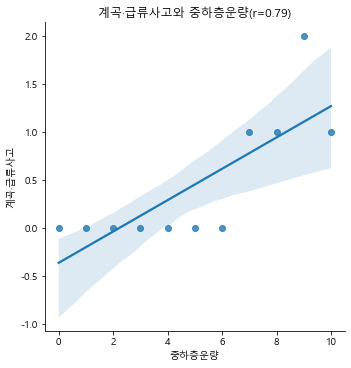

In [151]:
# 중하층운량
sns.lmplot(x='중하층운량',y='중하층운량_계곡·급류사고',data=data)

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('계곡·급류사고')
plt.title('계곡·급류사고와 중하층운량(r=0.79)')